In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


# Exercises

- Uses data from LendingClub.com
- Data is from 2007 - 2010
- We will use the data tp predict, whether a person repays its loan

In [3]:
df = pd.read_csv('loan_data.csv')

In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Data Explanation
- creadit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
- not.fully.paid: The quantity of interest for classification - whether the loan was not fully paid (1) or paid (0).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
#sns.pairplot(df, hue='not.fully.paid')
#plt.savefig('pairplot.png')

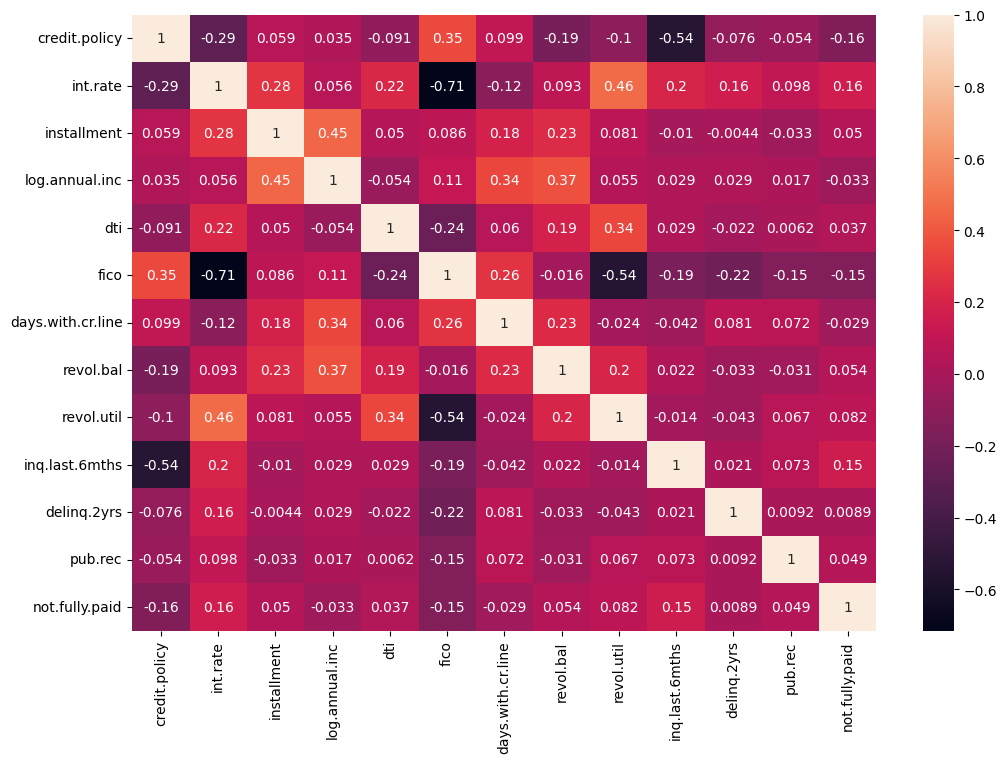

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns='purpose').corr(), annot=True)
plt.show()

In [25]:
correlation_matrix = df.drop(columns="purpose").corr()
correlation_with_target = correlation_matrix["not.fully.paid"].sort_values(ascending=False)
print(correlation_with_target)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64


In [ ]:
# Perform one-hot encoding on the 'purpose' column as it is currently not categorical
df_encoded = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Display the first few rows of the new dataframe
df_encoded.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [28]:
#sns.pairplot(df, hue='not.fully.paid', diag_kind='hist')

In [27]:
#plt.figure(figsize=(11,7))
#sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

> Now first train a decision tree classifier

In [29]:
X = df_encoded.drop('not.fully.paid',axis=1)
y = df_encoded['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
dtree_predictions = dtree.predict(X_test)

In [33]:
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1611
           1       0.21      0.23      0.22       305

    accuracy                           0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.75      0.74      0.75      1916



In [40]:
accuracy_score(y_test, dtree_predictions)

0.7416492693110647

> Now train a random forest classifier

In [34]:
rfc = RandomForestClassifier(n_estimators=200)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [36]:
rfc_predictions = rfc.predict(X_test)

In [37]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.33      0.02      0.03       305

    accuracy                           0.84      1916
   macro avg       0.59      0.51      0.47      1916
weighted avg       0.76      0.84      0.77      1916



In [38]:
for n_estimators in range(100, 1100, 100):
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    rfc.fit(X_train, y_train)
    rfc_predictions = rfc.predict(X_test)
    print(f"Classification report for {n_estimators} estimators:")
    print(classification_report(y_test, rfc_predictions))

Classification report for 100 estimators:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.60      0.03      0.06       305

    accuracy                           0.84      1916
   macro avg       0.72      0.51      0.49      1916
weighted avg       0.81      0.84      0.78      1916

Classification report for 200 estimators:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.43      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.64      0.51      0.48      1916
weighted avg       0.78      0.84      0.77      1916

Classification report for 300 estimators:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.38      0.02      0.03       305

    accuracy                           0.84      1916
  

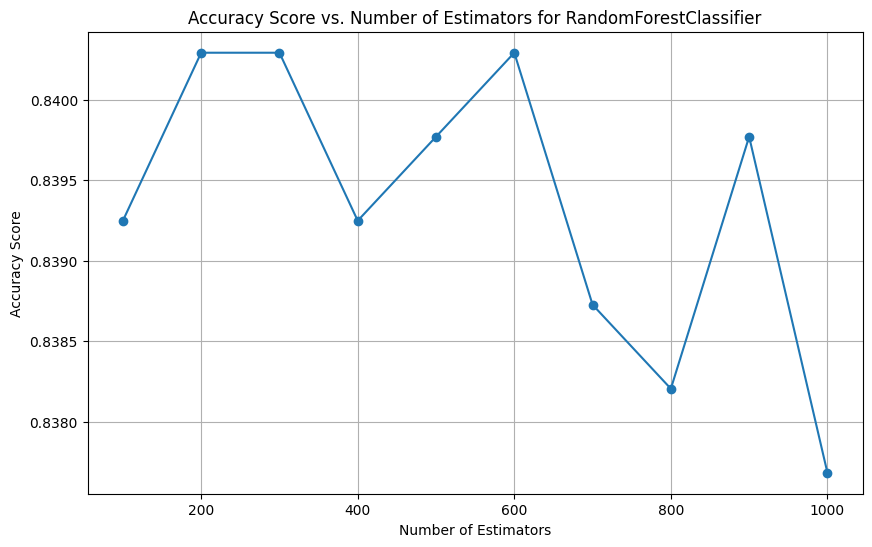

In [39]:
# Initialize lists to store the number of estimators and corresponding accuracy scores
n_estimators_list = list(range(100, 1100, 100))
accuracy_scores = []

# Loop through different numbers of estimators and store the accuracy scores
for n_estimators in n_estimators_list:
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    rfc.fit(X_train, y_train)
    rfc_predictions = rfc.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, rfc_predictions))

# Plot the accuracy scores against the number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracy_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Number of Estimators for RandomForestClassifier')
plt.grid(True)
plt.show()